In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import re 
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:


# Define the file path
file_path = r"C:\Users\91741\Desktop\MusicStreamingAnalysis\data\Global_Music_Streaming_Listener_Preferences.csv"

# Load the dataset
data = pd.read_csv(file_path)



In [3]:
print(data.head())

  User_ID  Age    Country Streaming Platform Top Genre  \
0   U1000   34      Japan              Tidal    Reggae   
1   U1001   24    Germany             Deezer   Country   
2   U1002   49    Germany             Deezer       Pop   
3   U1003   55  Australia            YouTube    Reggae   
4   U1004   13    Germany       Amazon Music    Reggae   

   Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
0                       295                    138              Adele   
1                        86                    388         Ed Sheeran   
2                       363                    368        Post Malone   
3                       348                    349           Dua Lipa   
4                        30                    328              Adele   

  Subscription Type Listening Time (Morning/Afternoon/Night)  \
0              Free                                Afternoon   
1           Premium                                    Night   
2           Premium 

In [4]:
data.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,36.664000,309.237200,253.51720,50.296464,42.391060
std,13.763844,172.029822,146.36928,23.171936,21.444121
min,13.000000,10.000000,1.00000,10.020000,5.000000
25%,25.000000,161.000000,126.00000,30.147500,24.195000
50%,37.000000,316.000000,254.00000,50.420000,41.960000
75%,49.000000,457.250000,382.00000,70.337500,60.740000
max,60.000000,600.000000,500.00000,89.990000,79.990000


In [5]:
#checking all coloums from datasets:
data.columns

Index(['User_ID', 'Age', 'Country', 'Streaming Platform', 'Top Genre',
       'Minutes Streamed Per Day', 'Number of Songs Liked',
       'Most Played Artist', 'Subscription Type',
       'Listening Time (Morning/Afternoon/Night)',
       'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)'],
      dtype='object')

In [6]:
# Replace 'Top Genre' with the actual column name you want
playing = data[[ 'Top Genre','Minutes Streamed Per Day', 'Number of Songs Liked','Most Played Artist','Listening Time (Morning/Afternoon/Night)',
       'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']].copy()  
#print(playing)

In [7]:
#drop rows with missing values in important coloumns

playing=playing.dropna(subset=['Listening Time (Morning/Afternoon/Night)',
       'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)'])

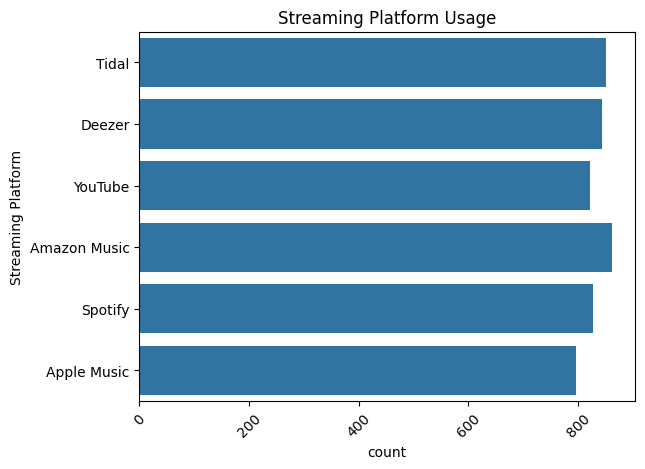

In [8]:
sns.countplot(data['Streaming Platform'])
plt.title('Streaming Platform Usage')
plt.xticks(rotation=45)
plt.show()

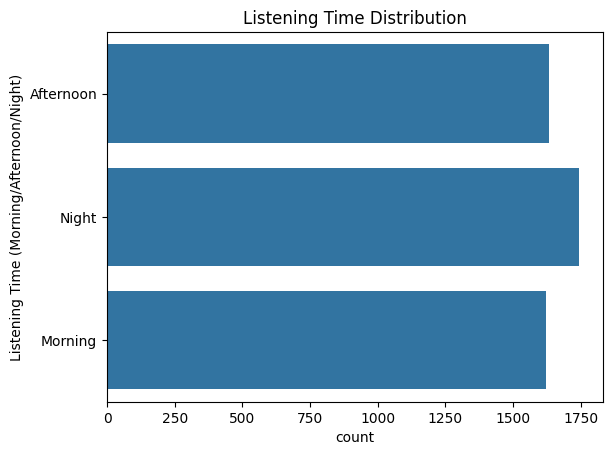

In [9]:
#Discover Listener Habits
sns.countplot(data['Listening Time (Morning/Afternoon/Night)'])
plt.title('Listening Time Distribution')
plt.show()

In [9]:
def parse_genres(genere_str):
    try:
        if isinstance(genere_str, str):
            TopGenre = ast.literal_eval(genere_str)
            if isinstance(TopGenre, list):
                return [g['name'] for g in TopGenre if isinstance(g, dict) and 'name' in g]
    except (ValueError, SyntaxError):
        pass
    return []


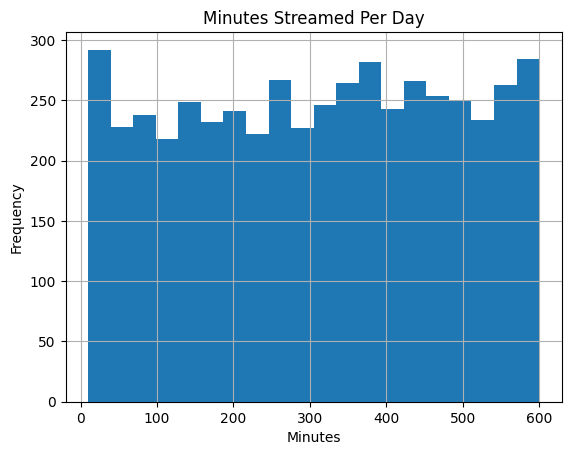

In [10]:
#Minutes Streamed Per Day
data['Minutes Streamed Per Day'].hist(bins=20)
plt.title('Minutes Streamed Per Day')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

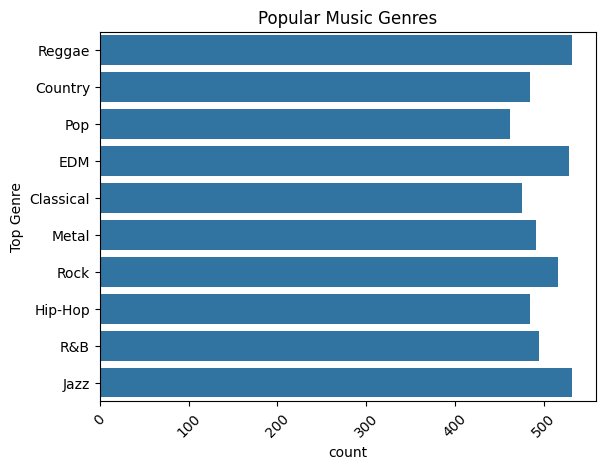

In [11]:
#view top generes
sns.countplot(data['Top Genre'])
plt.title('Popular Music Genres')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

In [12]:
mlb = MultiLabelBinarizer()
genre_encode = mlb.fit_transform(playing['Top Genre'])  # Use corrected column name
genre_df = pd.DataFrame(genre_encode, columns=mlb.classes_)
print(genre_df.head())  # Ensure genre names appear correctly

   &  -  B  C  D  E  H  J  M  P  ...  l  n  o  p  r  s  t  u  y  z
0  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1  0  0  0  1  0  0  0  0  0  0  ...  0  1  1  0  1  0  1  1  1  0
2  0  0  0  0  0  0  0  0  0  1  ...  0  0  1  1  0  0  0  0  0  0
3  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
4  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0

[5 rows x 27 columns]


In [13]:



scaler = MinMaxScaler()

# Specify numeric columns for scaling
numeric_cols = ['Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
scaled_features = scaler.fit_transform(playing[numeric_cols])

# Create a DataFrame with proper column names
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)

print(scaled_df.head())  # Display the scaled data

   Minutes Streamed Per Day  Number of Songs Liked  \
0                  0.483051               0.274549   
1                  0.128814               0.775551   
2                  0.598305               0.735471   
3                  0.572881               0.697395   
4                  0.033898               0.655311   

   Discover Weekly Engagement (%)  Repeat Song Rate (%)  
0                        0.467675              0.156554  
1                        0.025510              0.856781  
2                        0.464799              0.831844  
3                        0.265725              0.953594  
4                        0.258347              0.512202  


In [14]:


# Define the numeric columns for scaling
numeric_cols = ['Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

# Initialize and apply MinMaxScaler on the filtered dataset
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(playing[numeric_cols])

# Create a DataFrame with proper column names
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)

print(scaled_df.head())  # Display the scaled data

   Minutes Streamed Per Day  Number of Songs Liked  \
0                  0.483051               0.274549   
1                  0.128814               0.775551   
2                  0.598305               0.735471   
3                  0.572881               0.697395   
4                  0.033898               0.655311   

   Discover Weekly Engagement (%)  Repeat Song Rate (%)  
0                        0.467675              0.156554  
1                        0.025510              0.856781  
2                        0.464799              0.831844  
3                        0.265725              0.953594  
4                        0.258347              0.512202  


In [15]:
final_features = pd.concat([playing, scaled_df, genre_df], axis=1)

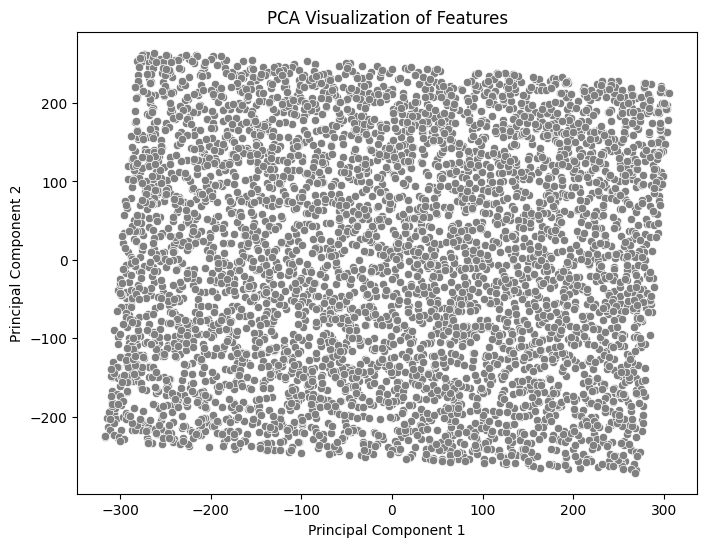

Explained variance ratio: [0.56974806 0.41103637]


In [16]:


# Ensure only numeric features are used for PCA
final_features_numeric = final_features.select_dtypes(include=[float, int])

# Drop any rows with NaN values (if any exist after selecting numeric columns)
final_features_numeric = final_features_numeric.dropna()

# Apply PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features_numeric)

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_features[:,0], y=reduced_features[:,1], color='gray')
plt.title('PCA Visualization of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Optional: Check the variance explained by the PCA components
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


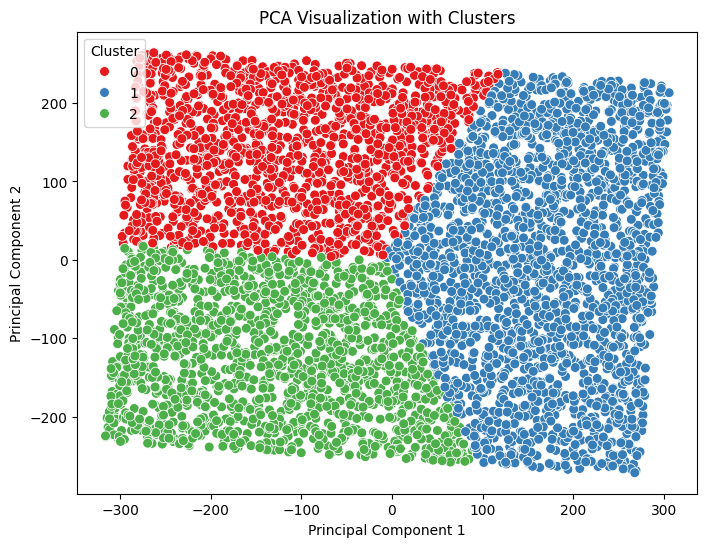

In [17]:


# Apply K-Means clustering to assign colors
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(reduced_features, columns=['PCA 1', 'PCA 2'])
pca_df['Cluster'] = clusters  # Assign clusters

# Plot PCA results with multiple colors
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PCA 1'], y=pca_df['PCA 2'], hue=pca_df['Cluster'], palette='Set1', s=50)
plt.title('PCA Visualization with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

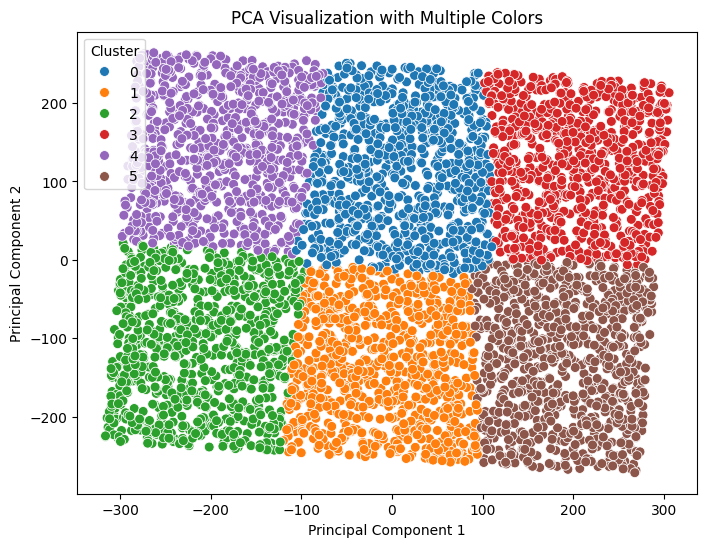

In [18]:

# Apply K-Means clustering with more clusters (e.g., 6 for diversity)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(reduced_features, columns=['PCA 1', 'PCA 2'])
pca_df['Cluster'] = clusters  # Assign clusters

# Plot PCA results with more colors
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PCA 1'], y=pca_df['PCA 2'], hue=pca_df['Cluster'], palette='tab10', s=50)
plt.title('PCA Visualization with Multiple Colors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

In [19]:
import numpy as np
import pandas as pd

# Convert individual components to NumPy arrays
scaled_array = scaled_df.to_numpy()
genre_array = genre_df.to_numpy()
pca_array = reduced_features  # PCA-transformed data

# Combine all features into one matrix
final_feature_matrix = np.hstack([scaled_array, genre_array, pca_array])

# Convert to DataFrame
final_features_numeric = pd.DataFrame(final_feature_matrix)

print(final_features_numeric.shape)  # Check dimensions

(5000, 33)


In [20]:
import numpy as np
import pandas as pd

# Convert components to NumPy arrays
scaled_array = scaled_df.to_numpy()
genre_array = genre_df.to_numpy()
pca_array = reduced_features  # PCA-transformed features

# Retrieve actual genre names
genre_names = list(mlb.classes_)  # Ensure these are meaningful names

# Define meaningful column names
scaled_features_names = [f"scaled_feature_{i}" for i in range(scaled_array.shape[1])]
pca_feature_names = [f"pca_feature_{i}" for i in range(pca_array.shape[1])]

# Create final DataFrame with proper column names
final_features_df = pd.DataFrame(
    np.hstack([scaled_array, genre_array, pca_array]),
    columns=scaled_features_names + genre_names + pca_feature_names
)

print(final_features_df.head())  # Check the updated DataFrame

   scaled_feature_0  scaled_feature_1  scaled_feature_2  scaled_feature_3  \
0          0.483051          0.274549          0.467675          0.156554   
1          0.128814          0.775551          0.025510          0.856781   
2          0.598305          0.735471          0.464799          0.831844   
3          0.572881          0.697395          0.265725          0.953594   
4          0.033898          0.655311          0.258347          0.512202   

     &    -    B    C    D    E  ...    o    p    r    s    t    u    y    z  \
0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   pca_feature_0  pca_feature_1  
0     -22.373265    -1

In [21]:
import numpy as np
from numpy.linalg import norm

# Compute item similarity based on user preferences
def recommend_similar_items(matrix, user_index):
    # Ensure user_index is valid
    if user_index >= matrix.shape[0] or user_index < 0:
        raise ValueError(f"User index {user_index} is out of bounds.")

    # Extract the user vector and handle missing values (NaN values filled with 0)
    user_vector = matrix.iloc[user_index].fillna(0)

    # Get top 5 items the user liked (those with a score > 0)
    top_items = user_vector[user_vector > 0].sort_values(ascending=False).index[:5]

    print(f"Top items for User {user_index}: {list(top_items)}")

    similar_items = {}

    # Compute item similarity using cosine similarity
    for item in top_items:
        item_vector = matrix[item].values
        for other_item in matrix.columns:
            if other_item not in top_items:  # Don't compare the item to itself or top items
                other_item_vector = matrix[other_item].values
                similarity = np.dot(item_vector, other_item_vector) / (norm(item_vector) * norm(other_item_vector) + 1e-10)
                similar_items[other_item] = similar_items.get(other_item, 0) + similarity

    # Normalize similarity scores
    max_sim = max(similar_items.values(), default=1)
    similar_items = {k: v / max_sim for k, v in similar_items.items()}

    # Sort recommendations in descending order
    sorted_recommendations = sorted(similar_items.items(), key=lambda x: x[1], reverse=True)

    return sorted_recommendations[:5]

# Example Usage
try:
    user_index = 0  # Example user index
    recommendations = recommend_similar_items(user_item_matrix, user_index)
    print(f"Recommendations for user {user_index}: {recommendations}")
except NameError as e:
    print(f"Error: {e}. Ensure user_item_matrix is defined correctly as a DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")


Error: name 'user_item_matrix' is not defined. Ensure user_item_matrix is defined correctly as a DataFrame.


In [22]:
#---------------

print(mlb.classes_)  # Check if these are actual genres

['&' '-' 'B' 'C' 'D' 'E' 'H' 'J' 'M' 'P' 'R' 'a' 'c' 'e' 'g' 'i' 'k' 'l'
 'n' 'o' 'p' 'r' 's' 't' 'u' 'y' 'z']


In [23]:
#----------
playing['Top Genre'] = playing['Top Genre'].apply(lambda x: x.split(",") if isinstance(x, str) else x)

In [26]:
mlb = MultiLabelBinarizer()
genre_encode = mlb.fit_transform(playing['Top Genre'])
genre_df = pd.DataFrame(genre_encode, columns=mlb.classes_)

# Generate updated fallback genres
fallback_indices = list(range(min(3, len(mlb.classes_))))  # Ensure indices are within range
fallback_genres = [mlb.classes_[i] for i in fallback_indices]

print("Corrected Fallback Genres:", fallback_genres)

Corrected Fallback Genres: ['Classical', 'Country', 'EDM']
